In [101]:
import pandas as pd
import numpy as np
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

df=pd.read_csv("data.csv", delimiter=';', index_col=["REPORTDATE"])
df.index = pd.to_datetime(df.index)
df.head()

,VALUE
REPORTDATE,
2013-12-30,3457625638
2013-12-31,3417092149
2014-01-01,3417092149
2014-02-01,3417092149
2014-03-01,3417092149


In [102]:
df.tail()

,VALUE
REPORTDATE,
2019-06-10,64630140507
2019-07-10,66115288637
2019-08-10,68424049766
2019-09-10,72492897583
2019-10-10,72307860851


In [103]:
df = validate_series(df)
print(df)

                  VALUE
REPORTDATE             
2013-12-30   3457625638
2013-12-31   3417092149
2014-01-01   3417092149
2014-01-02   4333581643
2014-01-03   5010720003
...                 ...
2019-12-05  73555567407
2019-12-06  74062556441
2019-12-07  78228598454
2019-12-08  76917198439
2019-12-09  74105978838

[2111 rows x 1 columns]


[<AxesSubplot:>]

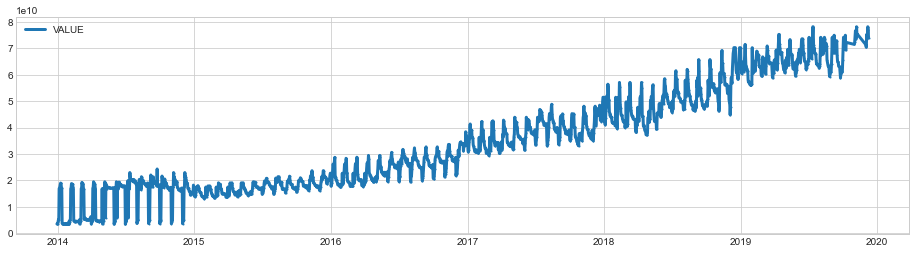

In [104]:
plot(df, ts_linewidth=3)

In [105]:
df.describe()

,VALUE
count,2.111000e+03
mean,3.389668e+10
std,1.875474e+10
min,3.282810e+09
25%,1.824160e+10
50%,3.021352e+10
75%,4.758339e+10
max,7.822860e+10


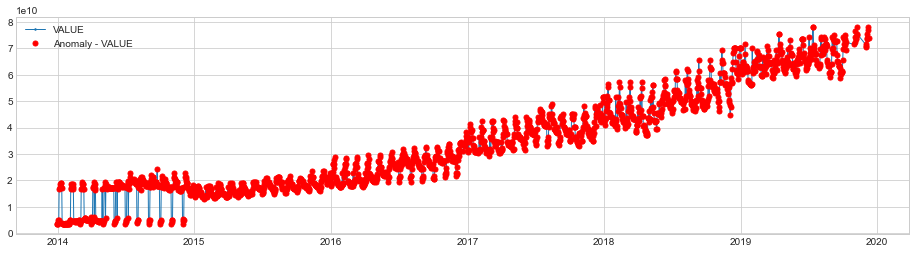

In [106]:
threshold_ad = ThresholdAD(high=2800, low=800)
anomalies = threshold_ad.detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

In [107]:
anomalies[anomalies.VALUE]

,VALUE
REPORTDATE,
2013-12-30,True
2013-12-31,True
2014-01-01,True
2014-01-02,True
2014-01-03,True
...,...
2019-12-05,True
2019-12-06,True
2019-12-07,True


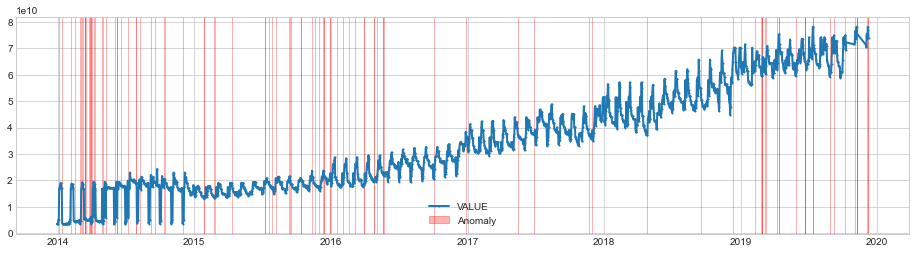

In [108]:
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies = outlier_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=2, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

In [109]:
anomalies[anomalies]

REPORTDATE
2014-01-05    True
2014-01-13    True
2014-02-05    True
2014-02-17    True
2014-03-02    True
              ... 
2019-11-08    True
2019-11-09    True
2019-12-04    True
2019-12-07    True
2019-12-08    True
Length: 106, dtype: bool

Text(0.5, 0.98, 'Мультипликативная модель')

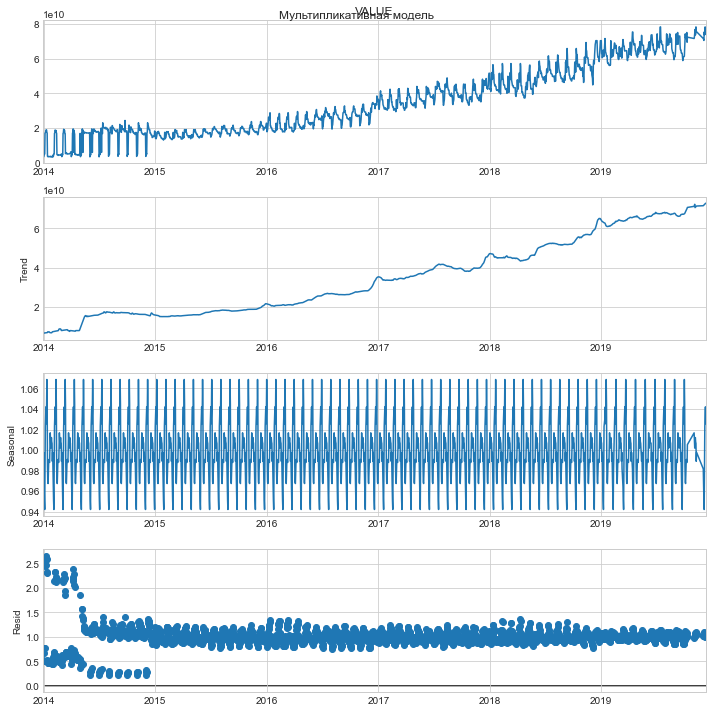

In [110]:
# декомпозиция 
result_M = seasonal_decompose(df.VALUE, model='multiplicative', extrapolate_trend='freq', period=30)

# Построение графика
plt.rcParams.update({'figure.figsize': (10,10)})
result_M.plot().suptitle('Мультипликативная модель')

In [111]:
result_M.seasonal['2016']

REPORTDATE
2016-01-01    1.068663
2016-01-02    1.044722
2016-01-03    0.984456
2016-01-04    0.968814
2016-01-05    0.967415
                ...   
2016-12-27    1.044722
2016-12-28    0.984456
2016-12-29    0.968814
2016-12-30    0.967415
2016-12-31    0.977122
Name: seasonal, Length: 366, dtype: float64

Text(0.5, 0.98, 'Адитивная модель')

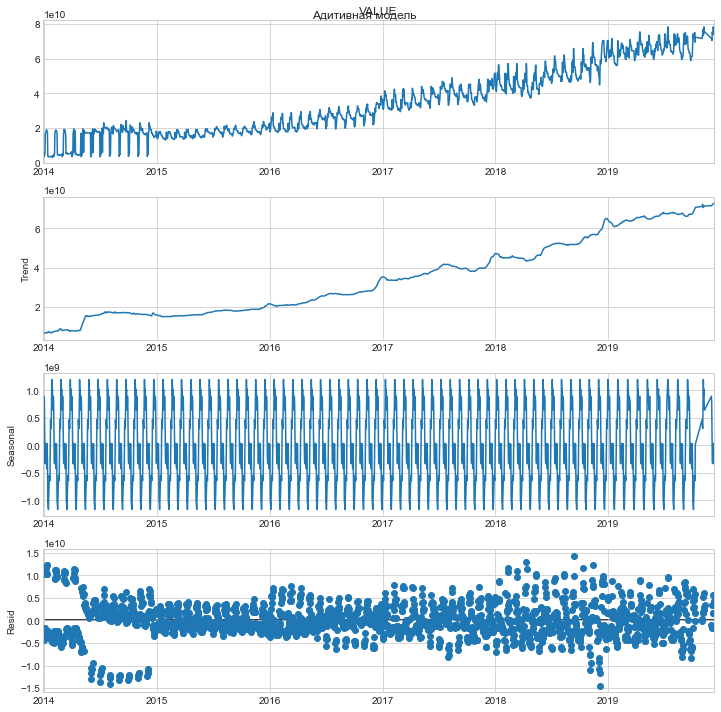

In [112]:
result_A = seasonal_decompose(df.VALUE, model='additive', extrapolate_trend='freq', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A.plot().suptitle('Адитивная модель')

In [464]:
train=df.VALUE
train.tail()

REPORTDATE
2019-12-05    73555567407
2019-12-06    74062556441
2019-12-07    78228598454
2019-12-08    76917198439
2019-12-09    74105978838
Name: VALUE, dtype: int64

In [465]:
df.VALUE.shape

(2111,)

In [466]:
test=df['2020':]
test.head()

,VALUE
REPORTDATE,


In [467]:
fit1 = ExponentialSmoothing(train, seasonal_periods=320, trend='add', seasonal='mul').fit()

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [468]:
fit1.params

{'smoothing_level': 0.8182142857142858,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 13219290930.30635,
 'initial_trend': 25583723.941743713,
 'initial_seasons': array([1.00028157, 0.98256679, 0.96076551, 0.97273197, 0.99365688,
        1.02886596, 1.03134777, 1.02703241, 1.02940376, 1.01635251,
        1.01694849, 1.05557904, 1.0529615 , 1.05638244, 1.04272482,
        1.02884829, 0.79832899, 0.79437524, 0.7986528 , 0.77533098,
        0.98943284, 1.02186293, 1.10897145, 1.08171845, 1.08352859,
        1.06556394, 1.0766239 , 1.06634799, 1.03554319, 1.05196475,
        0.96663292, 0.92743158, 0.93853549, 0.92375058, 0.92434479,
        0.93724733, 1.00473496, 0.98521604, 0.99925749, 0.99833254,
        0.98227251, 1.00469099, 1.05870116, 1.02826041, 1.00778863,
        1.04838727, 0.96249013, 0.95321229, 0.89501766, 0.90058123,
        0.89918048, 0.93964444, 0.95923951, 0.99156004, 0.98855471,
        0.96947361, 0.99913624, 1.03

In [469]:
fit1.fittedvalues

REPORTDATE
2013-12-30    1.324860e+10
2013-12-31    5.169082e+09
2014-01-01    3.676364e+09
2014-01-02    3.531315e+09
2014-01-03    4.302351e+09
                  ...     
2019-12-05    7.202103e+10
2019-12-06    9.644737e+10
2019-12-07    7.953170e+10
2019-12-08    8.330313e+10
2019-12-09    7.886299e+10
Length: 2111, dtype: float64

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


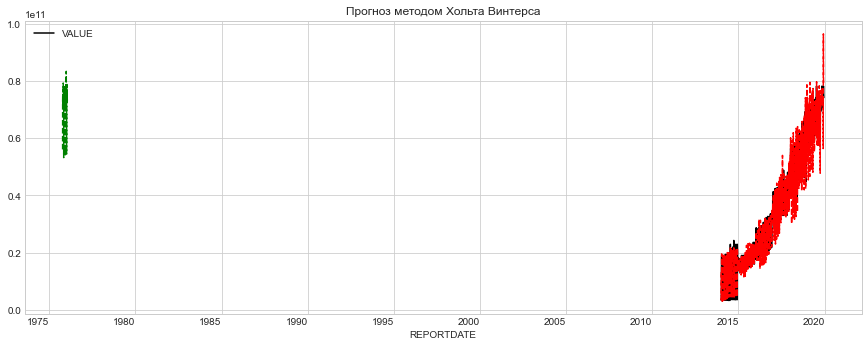

In [470]:
ax = df.plot(figsize=(15,6), color='black', title="Прогноз методом Хольта Винтерса" )
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit1.forecast(100).plot(ax=ax, style='--', color='green')
plt.show()

In [471]:
fit1.forecast(10)[2120]

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


71299586116.9932

In [472]:
fit1.forecast(30)[2140]

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


76101413496.77106

In [473]:
fit1.forecast(60)[2170]

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


73870199520.18526

In [474]:
fit1.forecast(100)[2210]

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


72965680218.30574

In [475]:
train=df['2013':'2018']
train.tail()

,VALUE
REPORTDATE,
2018-12-27,63337508415
2018-12-28,67151518085
2018-12-29,70288978644
2018-12-30,70288978644
2018-12-31,70288978644


In [476]:
test=df['2018':]
test.head()

,VALUE
REPORTDATE,
2018-01-01,51490636641
2018-01-02,42118526336
2018-01-03,42886772988
2018-01-04,40975470589
2018-01-05,43773571579


In [477]:
fit1 = ExponentialSmoothing(train, seasonal_periods=320, trend='add', seasonal='mul').fit()

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


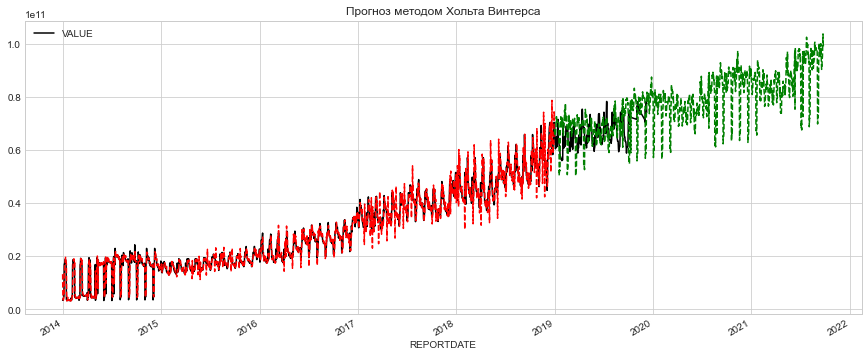

In [486]:
ax = df.plot(figsize=(15,6), color='black', title="Прогноз методом Хольта Винтерса" )
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit1.forecast(1000).plot(ax=ax, style='--', color='green')
plt.show()

In [482]:
from statsmodels.tsa.stattools import adfuller
def metrics(real, forecast):
    
    if type(real)==pd.core.frame.DataFrame:
        real=real[real.columns[0]].values
    
    print("Тест на стационарность:")
    dftest = adfuller(real-forecast, autolag='AIC')
    print("\tT-статистика = {:.3f}".format(dftest[0]))
    print("\tP-значение = {:.3f}".format(dftest[1]))
    print("Критические значения :")
    for k, v in dftest[4].items():
        print("\t{}: {} - Данные {} стационарны с вероятностью {}% процентов".format(k, v, "не" if v<dftest[0] else "", 100-int(k[:-1])))
    
    #real=np.array(real[real.columns[0]].values)
    forecast=np.array(forecast)
    print('MAD:', round(abs(real-forecast).mean(),4))
    print('MSE:', round(((real-forecast)**2).mean(),4))
    print('MAPE:', round((abs(real-forecast)/real).mean(),4))
    print('MPE:', round(((real-forecast)/real).mean(),4))
    print('Стандартная ошибка:', round(((real-forecast)**2).mean()**0.5,4))

In [483]:
metrics(train, fit1.fittedvalues)

Тест на стационарность:
	T-статистика = -18.970
	P-значение = 0.000
Критические значения :
	1%: -3.4339840952648695 - Данные  стационарны с вероятностью 99% процентов
	5%: -2.8631452508003057 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.567624583142913 - Данные  стационарны с вероятностью 90% процентов
MAD: 1760209124.6798
MSE: 9.389186647602674e+18
MAPE: 0.0846
MPE: -0.0236
Стандартная ошибка: 3064177972.5732


In [484]:
metrics(test, fit1.forecast(len(test)))

Тест на стационарность:
	T-статистика = -4.439
	P-значение = 0.000
Критические значения :
	1%: -3.4407064257994495 - Данные  стационарны с вероятностью 99% процентов
	5%: -2.866109523416927 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.5692034867497937 - Данные  стационарны с вероятностью 90% процентов
MAD: 16604244446.9504
MSE: 3.338262056002286e+20
MAPE: 0.3151
MPE: -0.3074
Стандартная ошибка: 18270911460.5766
